# Seaborn plots

**Lecture is based on:**
- https://seaborn.pydata.org/tutorial.html

---

- Mostly allows for an alternate look to your plots



- Uses matplotlib as a base
    - however, some syntax is different, while others are the same
    - functions that control some Seaborn things, for example:
        - markers=["D", "o"]
        - sizes=(10, 125)
        - edgecolor=".2"
        - linewidth=.5,
        - alpha=.75

### For citing seaborn:

@Misc{WaskomBOLHGAHCRPHVVKQBMSMBOYWEB2020,
Title = {seaborn: statistical data visualization},  
Author = {Michael Waskom and Olga Botvinnik and Joel Ostblom and Maoz Gelbar tand Saulius Lukauskas and Paul Hobson and David C Gemperline and Tom Augspurger and Yaroslav Halchenko and John B. Cole and Jordi Warmenhoven and Julian de Ruiter and Cameron Pye and Stephan Hoyer and Jake Vanderplas and Santi Villalba and Gero Kunter and Eric Quintero and Pete Bachant and Marcel Martin and Kyle Meyer and Corban Swain and Alistair Miles and Thomas Brunner and Drew O'Kane and Tal Yarkoni and Mike Lee Williams and Constantine Evans and Clark Fitzgerald and Brian},  
HowPublished = {\url{https://https://seaborn.pydata.org}},  
Note = {Accessed MONTH DAY, YEAR},  
Year = {2020},  
Doi = {10.5281/zenodo.3767070},  
}

---

**Introductory basics and examples**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## CSV data file acan be found at
## https://github.com/karlkirschner/2020_Scientific_Programming/blob/master/data_3d.csv

## For Colabs

## In order to upload data
from google.colab import files
uploaded = files.upload()


## For PEP8 analysis (via pycodestyle_magic) in colab:
#!pip install flake8 pycodestyle_magic
#%load_ext pycodestyle_magic

## on top of a new code cell include:
#%%pycodestyle

ModuleNotFoundError: No module named 'google'

In [3]:
df = pd.read_csv('data_3d.csv', header=0, sep=',')
df

,Time,Exp,Theory
0,0.0,0.1185,0.2255
1,0.5,0.6524,0.3052
2,1.0,0.1291,0.0744
3,1.5,0.9445,0.7611
4,2.0,0.0272,0.1183
5,2.5,0.7598,0.0450
6,3.0,0.8159,0.2669
7,3.5,0.8003,0.1770
8,4.0,0.5716,0.2433
9,4.5,0.6651,0.2302


In [4]:
## seaborn built-in styles
## darkgrid, whitegrid, dark, white and ticks
sns.set(style="ticks")

#### There are often different ways to do things, as demonstrated below


Example: Plotting x,y data (i.e. 2D plots)
- scatterplot
- relplot with kind=scatter
- replot with kind=line

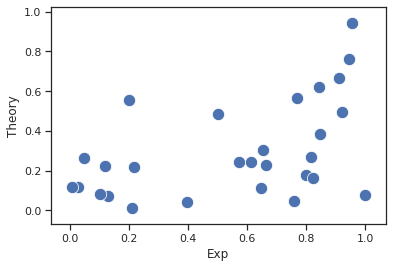

In [5]:
plt.figure()
sns.scatterplot(x="Exp", y="Theory", data=df, s=150)

## save at 300 dpi
plt.savefig('seaborn_test.png', bbox_inches='tight', dpi=300)

<Figure size 432x288 with 0 Axes>

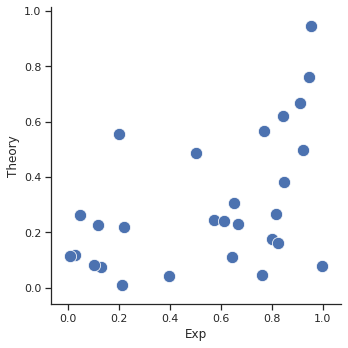

In [6]:
plt.figure()
sns.relplot(x="Exp", y="Theory", data=df, kind='scatter', s=150)

In [7]:
## plot using the data's index
plt.figure()
df_w_index = df.reset_index()
df_w_index

,index,Time,Exp,Theory
0,0,0.0,0.1185,0.2255
1,1,0.5,0.6524,0.3052
2,2,1.0,0.1291,0.0744
3,3,1.5,0.9445,0.7611
4,4,2.0,0.0272,0.1183
5,5,2.5,0.7598,0.0450
6,6,3.0,0.8159,0.2669
7,7,3.5,0.8003,0.1770
8,8,4.0,0.5716,0.2433
9,9,4.5,0.6651,0.2302


<Figure size 432x288 with 0 Axes>

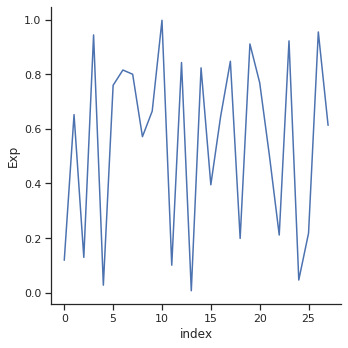

In [8]:
sns.relplot(x='index', y='Exp', data=df_w_index, kind='line')

Now, let's get into some specifics...


## Relplots (relational plots)

- https://seaborn.pydata.org/generated/seaborn.relplot.html


- Let's use a more complicated dataset that is built into seaborn


**Types of plots**
- line
- scatter

In [9]:
## relation plots via relplot: scatter and line
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Figure size 432x288 with 0 Axes>

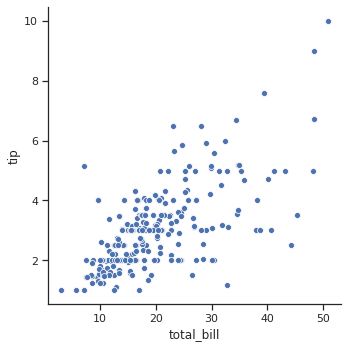

In [10]:
plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips, kind='scatter')
plt.show()

<Figure size 432x288 with 0 Axes>

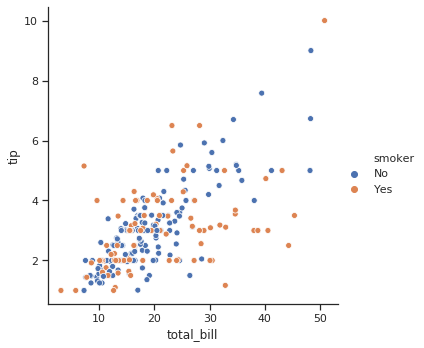

In [11]:
## color code according to smoker yes|no
plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips,
            hue="smoker",
            kind='scatter')
plt.show()

<Figure size 432x288 with 0 Axes>

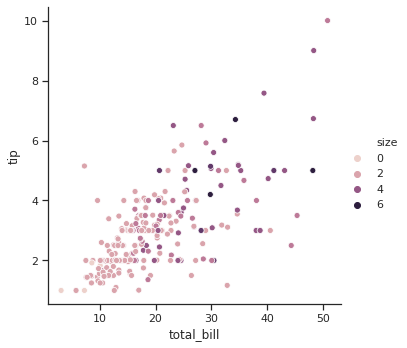

In [12]:
plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips,
            hue="size",
            kind='scatter')
plt.show()

<Figure size 432x288 with 0 Axes>

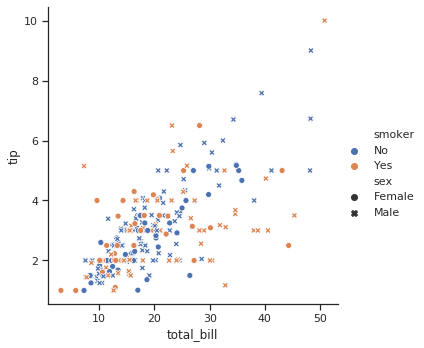

In [13]:
## now add differentiate according to the sex using makers
plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips,
            hue="smoker",
            style="sex",
            kind='scatter')
plt.show()

AttributeError: 'PathCollection' object has no property 'facet_kws_kws'

<Figure size 432x288 with 0 Axes>

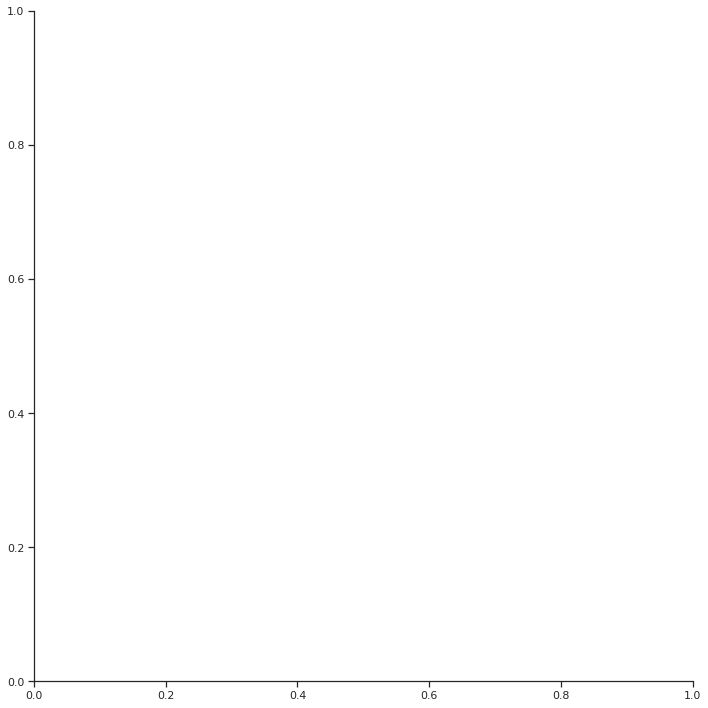

In [27]:
## for some plots, you can change the size by specifying `height` (in inches)
## Note for matplotlib we did this using `plt.figure(figsize=(15,5))`

plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips,
            hue="smoker",
            style="sex",
            kind='scatter', height=10.0, facet_kws_kws={"s": 100})
plt.show()

In [ ]:
## create multiple plots based on values
##   - column: col="header"
##   - row: row="header"

## example: "day", "size"
plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips,
            hue="time",
            col="day",
            kind='scatter')
plt.show()

<Figure size 432x288 with 0 Axes>

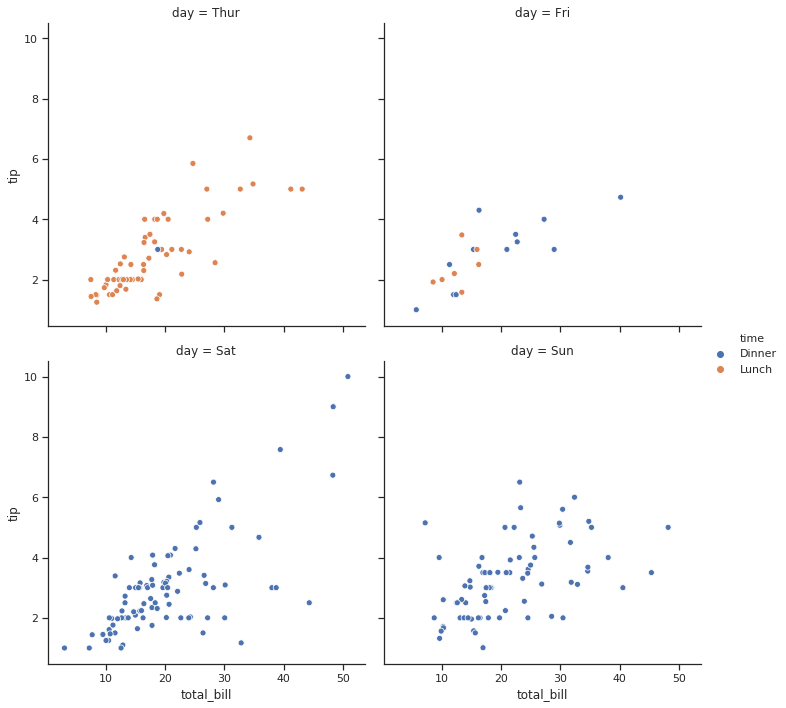

In [28]:
plt.figure()
sns.relplot(x="total_bill", y="tip", data=tips,
            hue="time",
            col="day", col_wrap=2,
            kind='scatter')
plt.show()

## Additional examples of plots that are not obvious to do using matplotlib

### Jointplots

- scatter plots with histograms


- https://seaborn.pydata.org/generated/seaborn.jointplot.html


**Kind**
- scatter
- reg (linear regression with 95% confidence interval)
- resid (residuals)
- kde (plots using kernel density estimates)
- hex (histogram with hexagonal bins)

<Figure size 432x288 with 0 Axes>

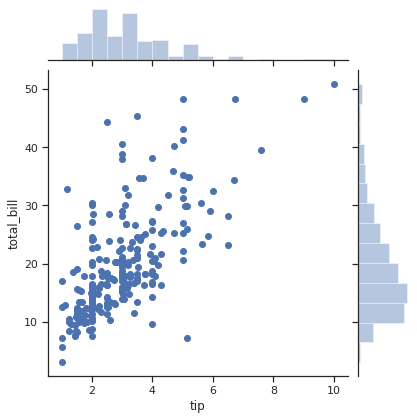

In [29]:
## basic
plt.figure()
sns.jointplot(x="tip", y="total_bill", data=tips,
             kind="scatter")
plt.show()

Add a regression line and kernel density fits

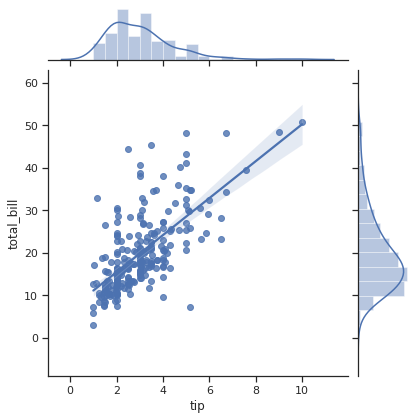

In [30]:
## linear regression with 95% confidence interval
sns.jointplot(x="tip", y="total_bill", data=tips, 
              kind="reg")

#### Kernel density estimation for smoothing data

- estimate population based on finite sampling

- https://en.wikipedia.org/wiki/Kernel_density_estimation

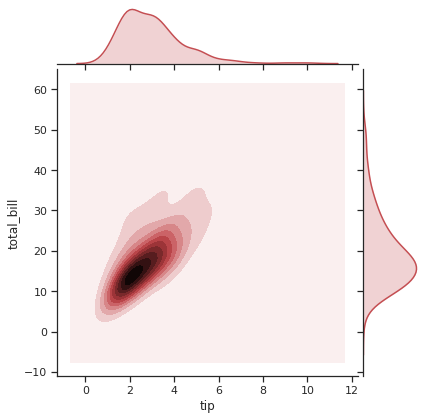

In [31]:
sns.jointplot(x="tip", y="total_bill", data=tips,
              kind="kde", space=0.1, color='r')

ValueError: could not convert string to float: 'Sun'

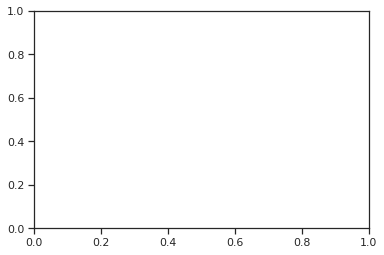

In [33]:
## a little more control with the number of levels
## cmap='Blues' or color='r'
sns.kdeplot(data=tips, x="tip", y="total_bill", n_levels=100, cmap='Blues', shade=True, thresh=0)

***
## Catagorical plots
For plots who data is within catagories (vs. looking for relationships via scatter plots).

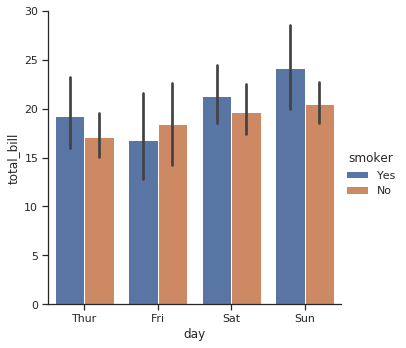

In [34]:
## barplots
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips)
plt.show()

#### Violin Plots

- https://en.wikipedia.org/wiki/Violin_plot


- https://seaborn.pydata.org/generated/seaborn.violinplot.html

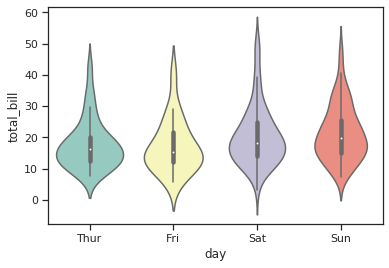

In [35]:
plt.figure()
sns.violinplot(x="day", y="total_bill", data=tips,
               palette="Set3")
plt.show()

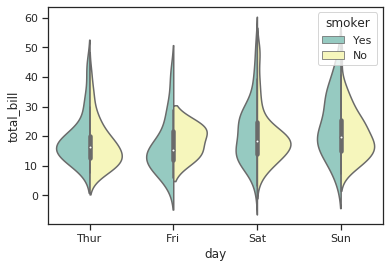

In [38]:
plt.figure()
sns.violinplot(x="day", y="total_bill", data=tips,
               palette="Set3",
               hue="smoker", split=True)
plt.show()

<Figure size 432x288 with 0 Axes>

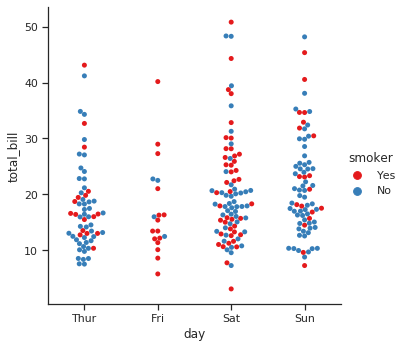

In [39]:
## plot bill total and smoker as a function of day
## note: three variables shown in 2-D

plt.figure()
sns.catplot(x="day", y="total_bill", data=tips,
            palette="Set1",
            hue="smoker",
            kind="swarm")
plt.show()

#### stripplot

- A scatterplot where one variable is categorical
- Use in combo with violin or box plots

- https://seaborn.pydata.org/generated/seaborn.stripplot.html

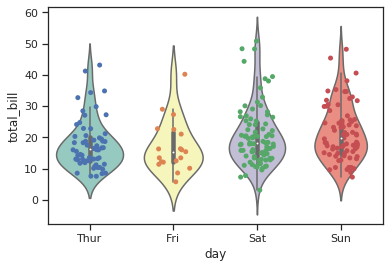

In [40]:
plt.figure()
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.2)
sns.violinplot(x="day", y="total_bill", data=tips, palette="Set3")
plt.show()

***
## Subplots

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

sns.boxplot(x="day", y="tip", data=tips,
            ax=axes[1])

sns.scatterplot(x="total_bill", y="tip", data=tips,
                hue="day",
                ax=axes[0])
plt.show()

## Pairwise associations of the data, with distributions

- Univariate distribution of the column data along the diagonal axes


- A good way to get an over of possible relationships within the data

In [ ]:
plt.figure()

sns.pairplot(data=tips, hue="day", kind="scatter")

plt.show()

In [ ]:
plt.figure()

sns.pairplot(data=tips, hue="day", kind="scatter", corner=True)

plt.show()

In [ ]:
plt.figure()

sns.pairplot(data=tips, hue="day", kind="reg", corner=True)

plt.show()

***
### Color Paletts in Seaborn
https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

**Possible values**:

Accent, Accent_r,

Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r,

CMRmap, CMRmap_r,

Dark2, Dark2_r,

GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r,

OrRd, OrRd_r, Oranges, Oranges_r,

PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r,

RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r,

Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r,

Wistia, Wistia_r,

YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r,

afmhot, afmhot_r, autumn, autumn_r,

binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,

cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r,

gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r,

hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r,

magma, magma_r, mako, mako_r,

nipy_spectral, nipy_spectral_r,

ocean, ocean_r,

pink, pink_r, plasma, plasma_r, prism, prism_r,

rainbow, rainbow_r, rocket, rocket_r,

seismic, seismic_r, spring, spring_r, summer, summer_r,

tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r,

viridis, viridis_r, vlag, vlag_r,

winter, winter_r

---
#### Qualitative

- Used with catagorical data (e.g. days of the week, smoker/non-smoker)


- For example:
    - pastel, deep, dark, colorblind
    - Paired, Set2

In [ ]:
len(sns.color_palette("pastel"))

In [ ]:
sns.palplot(sns.color_palette("pastel", 10))

In [ ]:
palette = "deep"
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

In [ ]:
palette = "dark"
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

In [ ]:
palette = "colorblind"
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

In [ ]:
palette = "Set2"
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

In [ ]:
palette = "Paired"
sns.palplot(sns.color_palette(palette, len(sns.color_palette(palette))))

#### Sequential

- Sequential data where you need to highlight the one end and the middle part of the data (e.g. elevation)


- Examples
    - Blues
    - cubehelix
    - GnBu_d


In [ ]:
sns.palplot(sns.color_palette("Blues", 20))

In [ ]:
## reversed
sns.palplot(sns.color_palette("Blues_r", 20))

In [ ]:
sns.palplot(sns.color_palette("GnBu", 20))

In [ ]:
## dark
sns.palplot(sns.color_palette("GnBu_d", 20))

In [ ]:
sns.palplot(sns.color_palette("cubehelix", 20))

#### divergent

- Use when the high and low values are more intersting (and the middle is not) - e.g. data normalized from -1 to +1

- Example
    - Spectral
    - BrBG
    - RdBu
    

In [ ]:
sns.palplot(sns.color_palette("Spectral", 20))

In [ ]:
sns.palplot(sns.color_palette("BrBG", 20))

In [ ]:
sns.palplot(sns.color_palette("RdBu", 20))

In [ ]:
plt.figure()

## qualitative: dark vs Set2
sns.pairplot(data=tips, hue="day", kind="scatter", palette='Set2', corner=True)

plt.show()

---

#### Additional examples for other packages:

https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=Xn0jLwr8evoR